In [143]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [332]:
x1 = np.random.randn(100)
x2 = 0.5*np.random.randn(100)
noise = 0.25 * np.random.randn(100)
y = 3* x1 - 2*x2 + noise

X = np.vstack([x1,x2])
y = y.reshape(1,100)

In [334]:
X.shape
x1 == X[0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [59]:
def GradientDescent(beta, X, y, learning_rate = 0.001):
    _,m = X.shape
    y_hat = np.matmul(beta.transpose(), X)
    beta = beta - learning_rate/m * np.matmul(X, (y_hat - y).transpose())
    return beta

In [85]:
def compute_cost(beta, X, y):
    y_hat = np.matmul(beta.transpose(), X)
    cost = 1/2*np.mean((y_hat - y)**2)
    return cost

In [352]:
def StochasticGradientDescent(beta, X, y, learning_rate = 0.001):
    _, m = X.shape
    idx = np.random.permutation(np.arange(m))
    X = X[:, idx]
    y = y[:, idx]
    beta_memory = []
    for i in range(m):
        y_hat = np.matmul(beta.transpose(), X[:, i].reshape(2,1))
        beta = beta - learning_rate * np.matmul(X[:, i].reshape(2,1), (y_hat - y[:,i]))
        beta_memory.append(beta)
    return beta, beta_memory

In [347]:
def MiniBatchGradientDescent(beta, X, y, learning_rate = 0.001, batch_size = None):
    _, m = X.shape
    idx = np.random.permutation(np.arange(m))
    X = X[:, idx]
    y = y[:, idx]
    beta_memory = []
    if batch_size == None:
        batch_size = int(m//5)
    n_splits = int(np.ceil(m/batch_size))
    mini_batches_idx = np.split(np.arange(m), batch_size*np.arange(1, n_splits))
    for idx in mini_batches_idx:
        y_hat = np.matmul(beta.transpose(), X[:, idx])
        beta = beta - learning_rate * np.matmul(X[:, idx], (y_hat - y[:,idx]).transpose())
        beta_memory.append(beta)
    return beta, beta_memory

In [86]:
def training(X,y, n_epochs = 1000, learning_rate = 0.001):
    n, m = X.shape
    beta_history = []
    cost_history = []
    beta = np.random.randn(n,1)
    cost = compute_cost(beta, X, y)
    beta_history.append(beta)
    cost_history.append(cost)
    for i in range(n_epochs):
        beta = GradientDescent(beta, X, y, learning_rate)
        cost = compute_cost(beta, X, y)
        beta_history.append(beta)
        cost_history.append(cost)
        print(f'\rCurrent iteration {i+1}/{n_epochs}| Training cost: {cost}', end = '')
        if i % (n_epochs//10) == 0:
            print(f'\rCurrent iteration {i+1}/{n_epochs}| Training cost: {cost}')
    return beta, beta_history, cost_history

In [353]:
def training_SGD(X,y, n_epochs = 1000, learning_rate = 0.005, decay_factor = 0.95):
    n, m = X.shape
    beta_history = []
    cost_history = []
    beta = np.random.randn(n,1)
    cost = compute_cost(beta, X, y)
    beta_history.append(beta)
    cost_history.append(cost)
    for i in range(n_epochs):
        beta, beta_memory = StochasticGradientDescent(beta, X, y, learning_rate)
        cost = compute_cost(beta, X, y)
        beta_history.extend(beta_memory)
        cost_history.append(cost)
        print(f'\rCurrent iteration {i+1}/{n_epochs}| Training cost: {cost}', end = '')
        if i % (n_epochs//50) == 0:
            learning_rate *= decay_factor
        if i % (n_epochs//10) == 0:
            print(f'\rCurrent iteration {i+1}/{n_epochs}| Training cost: {cost}')
    return beta, beta_history, cost_history

In [348]:
def training_MBGD(X,y, n_epochs = 1000, learning_rate = 0.005, decay_factor = 0.95, batch_size = None):
    n, m = X.shape
    beta_history = []
    cost_history = []
    beta = np.random.randn(n,1)
    cost = compute_cost(beta, X, y)
    beta_history.append(beta)
    cost_history.append(cost)
    for i in range(n_epochs):
        beta, beta_memory = MiniBatchGradientDescent(beta, X, y, learning_rate, batch_size)
        cost = compute_cost(beta, X, y)
        beta_history.extend(beta_memory)
        cost_history.append(cost)
        print(f'\rCurrent iteration {i+1}/{n_epochs}| Training cost: {cost}', end = '')
        if i % (n_epochs//50) == 0:
            learning_rate *= decay_factor
        if i % (n_epochs//10) == 0:
            print(f'\rCurrent iteration {i+1}/{n_epochs}| Training cost: {cost}')
    return beta, beta_history, cost_history

In [414]:
np.random.seed(2)
beta, beta_history, cost_history = training(X,y, n_epochs = 3000, learning_rate = 0.005)

Current iteration 1/3000| Training cost: 6.832549076791423
Current iteration 301/3000| Training cost: 0.48898849931311986
Current iteration 601/3000| Training cost: 0.12898529142656626
Current iteration 901/3000| Training cost: 0.06568709802566206
Current iteration 1201/3000| Training cost: 0.043712160570023916
Current iteration 1501/3000| Training cost: 0.035197596215432665
Current iteration 1801/3000| Training cost: 0.031861855708441244
Current iteration 2101/3000| Training cost: 0.030553659461724537
Current iteration 2401/3000| Training cost: 0.030040566988971493
Current iteration 2701/3000| Training cost: 0.029839323277571456
Current iteration 3000/3000| Training cost: 0.029760551117981135

In [380]:
np.random.seed(2)
beta_SGD, beta_history_SGD, cost_history_SGD = training_SGD(X,y, n_epochs = 3000, learning_rate = 0.005, decay_factor = 1)

Current iteration 1/3000| Training cost: 2.538365235976555
Current iteration 301/3000| Training cost: 0.029709622403385833
Current iteration 601/3000| Training cost: 0.029711249124153554
Current iteration 901/3000| Training cost: 0.029709598613107453
Current iteration 1201/3000| Training cost: 0.029709856225972622
Current iteration 1501/3000| Training cost: 0.029709803545613137
Current iteration 1801/3000| Training cost: 0.029709534955087614
Current iteration 2101/3000| Training cost: 0.029716097097235338
Current iteration 2401/3000| Training cost: 0.029710686235739348
Current iteration 2701/3000| Training cost: 0.029710728494558807
Current iteration 3000/3000| Training cost: 0.029709585585502917

In [367]:
np.random.seed(2)
beta_MBGD, beta_history_MBGD, cost_history_MBGD = training_MBGD(X,y, n_epochs = 3000, learning_rate = 0.005, decay_factor = 1)

Current iteration 1/3000| Training cost: 2.403410268959428
Current iteration 301/3000| Training cost: 0.029709570111555516
Current iteration 601/3000| Training cost: 0.029712343012377063
Current iteration 901/3000| Training cost: 0.029709717641752464
Current iteration 1201/3000| Training cost: 0.029709702188354156
Current iteration 1501/3000| Training cost: 0.029709842859599416
Current iteration 1801/3000| Training cost: 0.029709513604424996
Current iteration 2101/3000| Training cost: 0.029717949923071015
Current iteration 2401/3000| Training cost: 0.029710333118093936
Current iteration 2701/3000| Training cost: 0.029710670881862494
Current iteration 3000/3000| Training cost: 0.029709578856957387

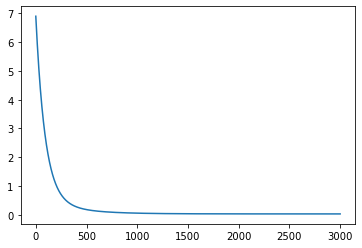

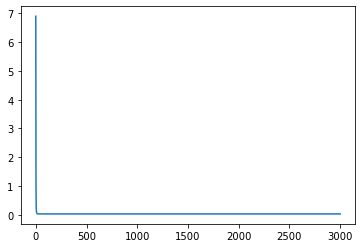

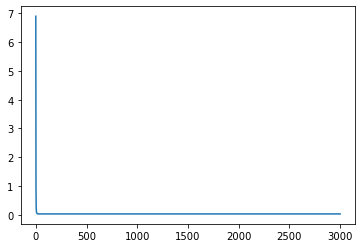

In [415]:
plt.plot(range(len(cost_history)), cost_history)
plt.show()
plt.plot(range(len(cost_history_SGD)), cost_history_SGD)
plt.show()
plt.plot(range(len(cost_history_MBGD)), cost_history_MBGD)
plt.show()

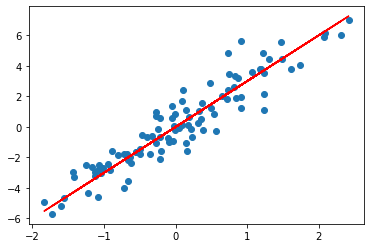

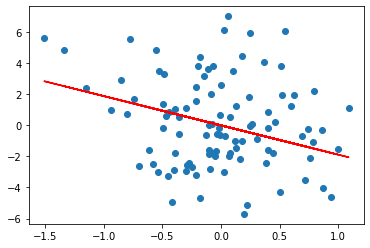

In [230]:
plt.scatter(X[0], y)
plt.plot(X[0], beta[0]*X[0], color = 'red')
plt.show()

plt.scatter(X[1], y)
plt.plot(X[1], beta[1]*X[1], color = 'red')
plt.show()

In [382]:
beta_history_p = np.array([[float(beta[0]), float(beta[1])] for beta in beta_history])
beta_history_SGD_p = np.array([[float(beta[0]), float(beta[1])] for beta in beta_history_SGD])
beta_history_MBGD_p = np.array([[float(beta[0]), float(beta[1])] for beta in beta_history_MBGD])

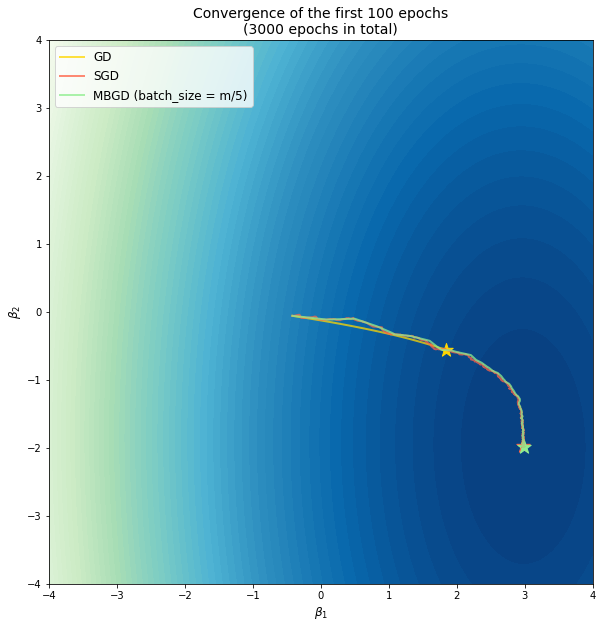

In [426]:
beta1_arr = np.linspace(-4, 4, 300)
beta2_arr = np.linspace(-4, 4, 300)
beta1_arr, beta2_arr = np.meshgrid(beta1_arr, beta2_arr)
cost_space = np.zeros(beta1_arr.shape)
for i in range(beta1_arr.shape[0]):
    for j in range(beta1_arr.shape[1]):
        cost_space[i,j] = compute_cost(np.array([[beta1_arr[i,j]], [beta2_arr[i,j]]]), X, y)
plt.figure(figsize = (10,10))
plt.axes().set_aspect('equal')
plt.contourf(beta1_arr, beta2_arr, cost_space, levels = 75, cmap = cm.GnBu_r)
plt.plot(beta_history_p[:100,0],beta_history_p[:100,1], color = "gold", lw = 2, label = "GD", alpha = 0.75)
plt.scatter(beta_history_p[99,0],beta_history_p[99,1], color = "gold", marker = "*", s = 200)
plt.plot(beta_history_SGD_p[:10000,0],beta_history_SGD_p[:10000,1], color = "tomato", lw = 2, label = "SGD", alpha = 0.75)
plt.scatter(beta_history_SGD_p[9999,0],beta_history_SGD_p[9999,1], color = "tomato", marker = "*", s = 200)
plt.plot(beta_history_MBGD_p[:500,0],beta_history_MBGD_p[:500,1], color = "lightgreen", lw = 2, label = "MBGD (batch_size = m/5)", alpha = 0.75)
plt.scatter(beta_history_MBGD_p[499,0],beta_history_MBGD_p[499,1], color = "lightgreen", marker = "*", s = 200)
plt.legend(loc = 'upper left', fontsize = 12)
plt.title('Convergence of the first 100 epochs\n(3000 epochs in total)',  fontsize = 14)
plt.xlabel(r'$\beta_1$', fontsize = 12)
plt.ylabel(r'$\beta_2$', fontsize = 12)
plt.show()

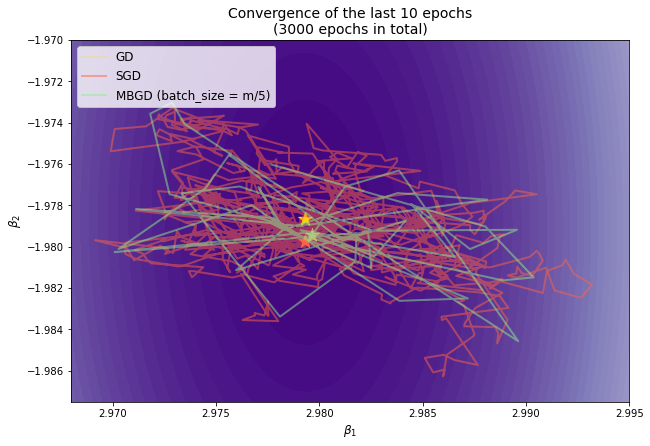

In [430]:
beta1_arr = np.linspace(2.96, 3, 300)
beta2_arr = np.linspace(-2, -1.96, 300)
beta1_arr, beta2_arr = np.meshgrid(beta1_arr, beta2_arr)
cost_space = np.zeros(beta1_arr.shape)
for i in range(beta1_arr.shape[0]):
    for j in range(beta1_arr.shape[1]):
        cost_space[i,j] = compute_cost(np.array([[beta1_arr[i,j]], [beta2_arr[i,j]]]), X, y)
        
plt.figure(figsize = (10,10))
plt.axes().set_aspect('equal')
plt.contourf(beta1_arr, beta2_arr, cost_space, levels = 70, cmap = cm.Purples_r)
plt.plot(beta_history_p[-10:,0],beta_history_p[-10:,1], color = "gold", lw = 2, label = "GD", alpha = 0.2)
plt.scatter(beta_history_p[-1,0],beta_history_p[-1,1], color = "gold", marker = "*", s = 200)
plt.plot(beta_history_SGD_p[-1000:,0],beta_history_SGD_p[-1000:,1], color = "tomato", lw = 2, label = "SGD", alpha = 0.5)
plt.scatter(beta_history_SGD_p[-1,0],beta_history_SGD_p[-1,1], color = "tomato", marker = "*", s = 200)
plt.plot(beta_history_MBGD_p[-50:,0],beta_history_MBGD_p[-50:,1], color = "lightgreen", lw = 2, label = "MBGD (batch_size = m/5)", alpha = 0.5)
plt.scatter(beta_history_MBGD_p[-1,0],beta_history_MBGD_p[-1,1], color = "lightgreen", marker = "*", s = 200)
plt.xlim(2.968,2.995)
plt.ylim(-1.9875,-1.97)
plt.legend(loc = 'upper right', fontsize = 16)
plt.legend(loc = 'upper left', fontsize = 12)
plt.title('Convergence of the last 10 epochs\n(3000 epochs in total)',  fontsize = 14)
plt.xlabel(r'$\beta_1$', fontsize = 12)
plt.ylabel(r'$\beta_2$', fontsize = 12)
plt.show()

In [393]:
np.max(cost_space), np.min(cost_space)

(19.42188956683073, 0.029709762277178652)